# Forecasting

## Config environemnt

In [178]:
# Import library to use operating system functions
import os

In [179]:
# Set workspace
for dirname, _, filenames in os.walk('/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/.DS_Store
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/LICENSE
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/UCI_Credit_Card.csv
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/README.md
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/PJME_hourly.csv
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/.gitignore
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/CreditCardForecasting.ipynb
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/.git/.DS_Store
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/.git/config
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/.git/HEAD
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/.git/description
/Users/macbookpro/Developer/GitHub/Generickle/credit-card-forecasting/.gi

## Load data

In [180]:
# Import library to manage files
import pandas as pd

In [226]:
# Load dataset
uci_credit_card_data = pd.read_csv('UCI_Credit_Card.csv')

uci_credit_card_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [182]:
# Select variables for forecasting
uci_cc_forecast_columns = [
    'LIMIT_BAL',
    'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

uci_cc_forecast_data = uci_credit_card_data[uci_cc_forecast_columns]

uci_cc_forecast_data.head()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


## EDA

In [183]:
# Stats summary
print(uci_cc_forecast_data.describe())

            LIMIT_BAL         PAY_1         PAY_2         PAY_3         PAY_4  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667     -0.016700     -0.133767     -0.166200     -0.220667   
std     129747.661567      1.123802      1.197186      1.196868      1.169139   
min      10000.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%      50000.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%     140000.000000      0.000000      0.000000      0.000000      0.000000   
75%     240000.000000      0.000000      0.000000      0.000000      0.000000   
max    1000000.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_5         PAY_6      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      -0.266200     -0.291100   51223.330900   49179.075167  4.701315e+04   
std        1.133187      1.

In [184]:
# Verify null data
uci_cc_forecast_data.isnull().sum()

LIMIT_BAL    0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [185]:
# Replace null data with mean values
uci_cc_forecast_data.fillna(uci_cc_forecast_data.mean(), inplace = True)

/var/folders/1l/1176zbkd1hd_ksjsrk705xxc0000gn/T/ipykernel_1845/1127213978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uci_cc_forecast_data.fillna(uci_cc_forecast_data.mean(), inplace = True)


In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

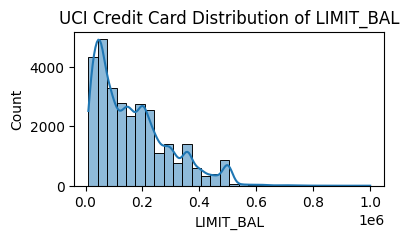

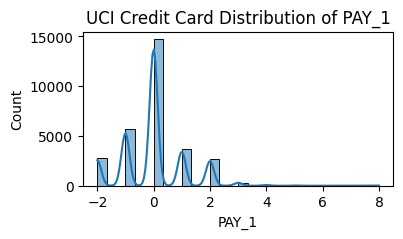

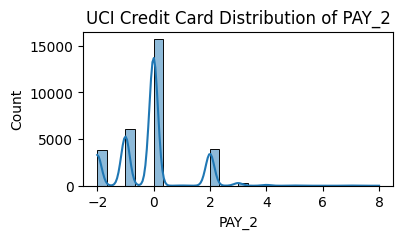

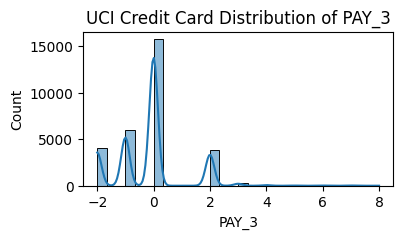

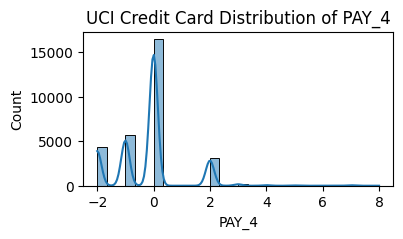

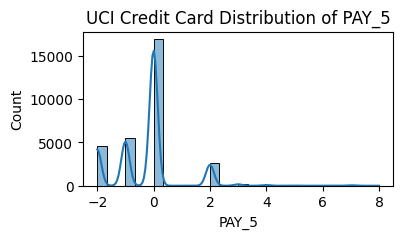

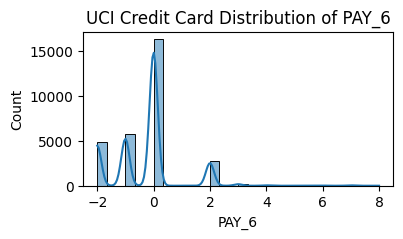

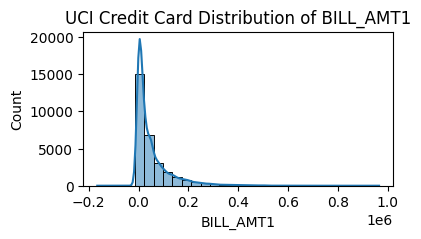

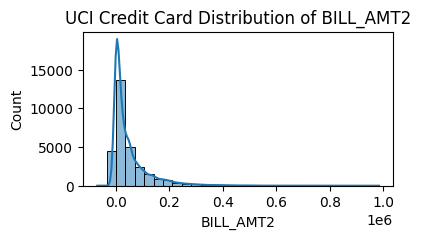

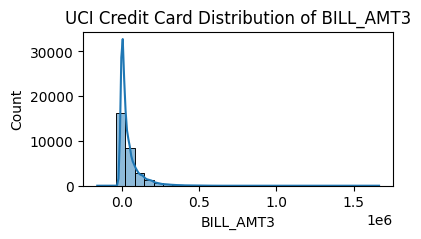

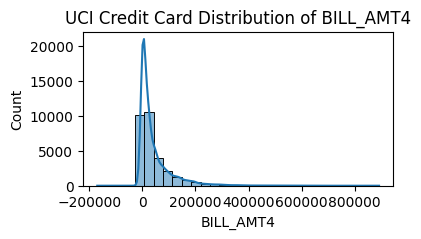

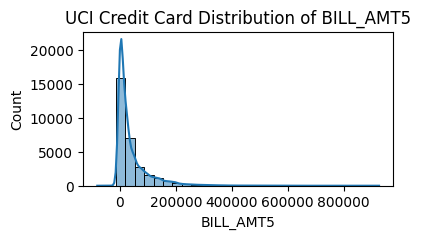

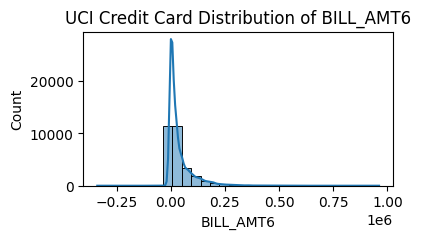

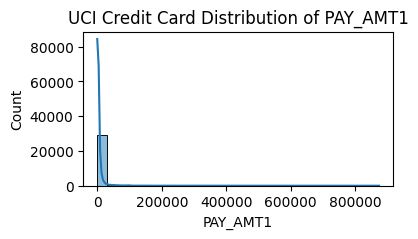

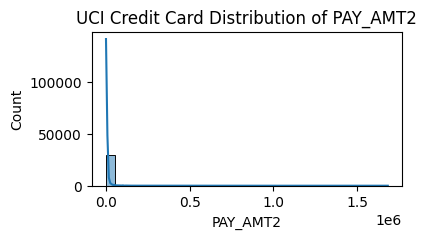

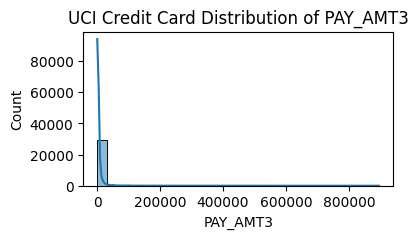

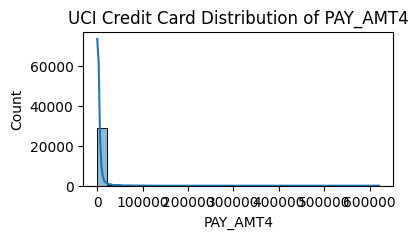

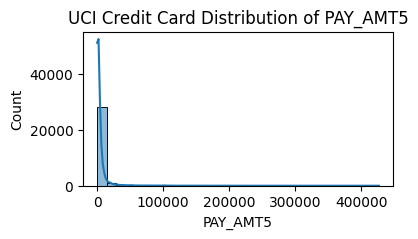

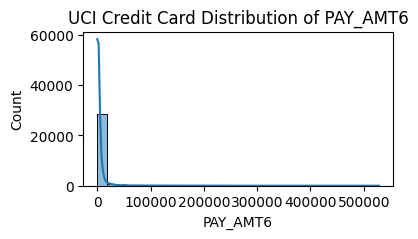

In [187]:
# Histograms for numeric variables
uci_cc_numeric_columns = uci_cc_forecast_data.select_dtypes(include = ['float64', 'int64']).columns

for col in uci_cc_numeric_columns:
    plt.figure(figsize = (4, 2))
    sns.histplot(uci_cc_forecast_data[col], kde = True, bins = 30)
    plt.title(f"UCI Credit Card Distribution of {col}")
    plt.show()


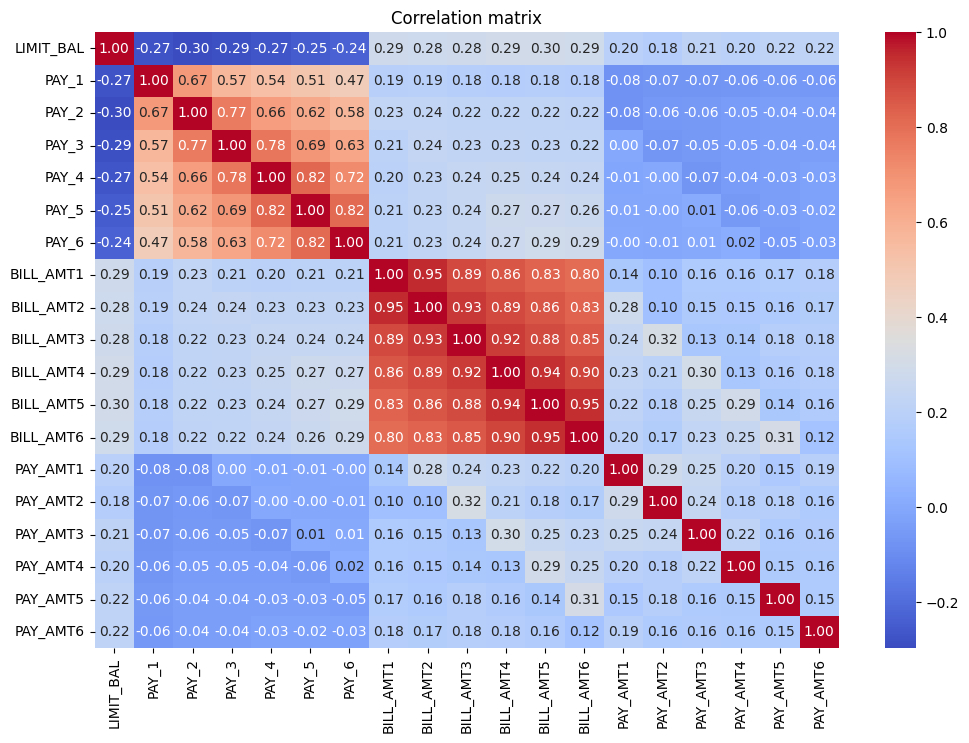

In [188]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(uci_cc_forecast_data.corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.title("Correlation matrix")
plt.show()

## Prepare data for Forcasting

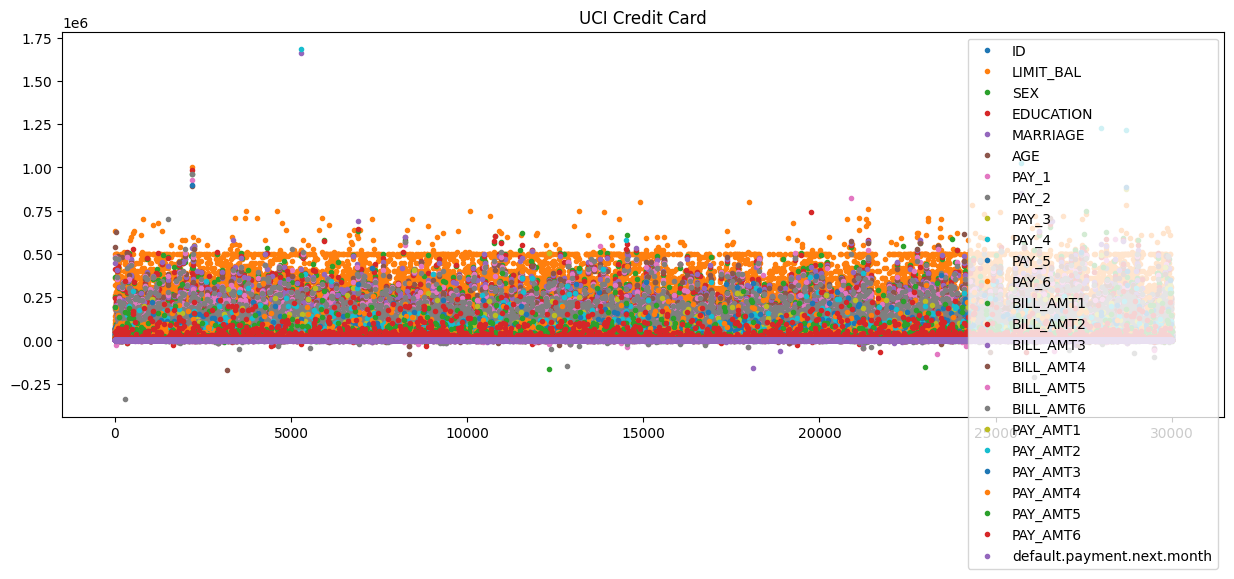

In [189]:
_ = uci_credit_card_data.plot(style = '.', figsize = (15,5), title = 'UCI Credit Card')

In [190]:
# Reshape the data for plotting
bill_amt_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

uci_cc_forecasting_data_melted = uci_credit_card_data.melt(
    id_vars = ['ID'],
    value_vars = bill_amt_columns,
    var_name = 'Month',
    value_name = 'BILL_AMT'
)

# Map the month names to more readable format
month_mapping = {
    'BILL_AMT1': 'Month 1',
    'BILL_AMT2': 'Month 2',
    'BILL_AMT3': 'Month 3',
    'BILL_AMT4': 'Month 4',
    'BILL_AMT5': 'Month 5',
    'BILL_AMT6': 'Month 6'
}

uci_cc_forecasting_data_melted['Month'] = uci_cc_forecasting_data_melted['Month'].map(month_mapping)

uci_cc_forecasting_data_melted = uci_cc_forecasting_data_melted[['Month', 'BILL_AMT']]

uci_cc_forecasting_data_melted.head()

,Month,BILL_AMT
0,Month 1,3913.0
1,Month 1,2682.0
2,Month 1,29239.0
3,Month 1,46990.0
4,Month 1,8617.0


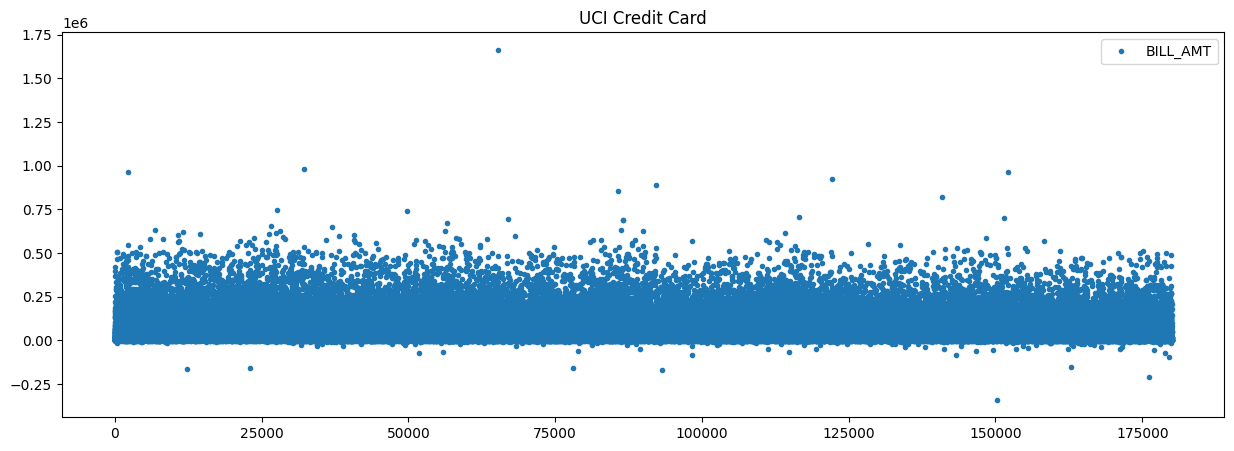

In [191]:
_ = uci_cc_forecasting_data_melted.plot(style='.', figsize=(15,5), title='UCI Credit Card')

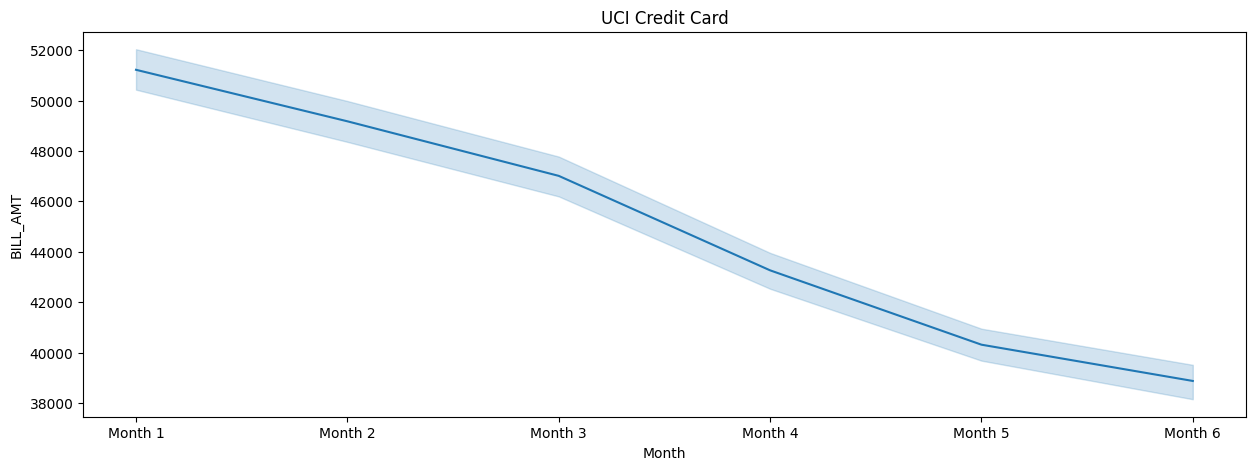

In [192]:
#Plot BILL_AMT vs Month using line plot
plt.figure(figsize=(15,5))
sns.lineplot(x='Month', y='BILL_AMT', data=uci_cc_forecasting_data_melted)
plt.title('UCI Credit Card')
plt.show()

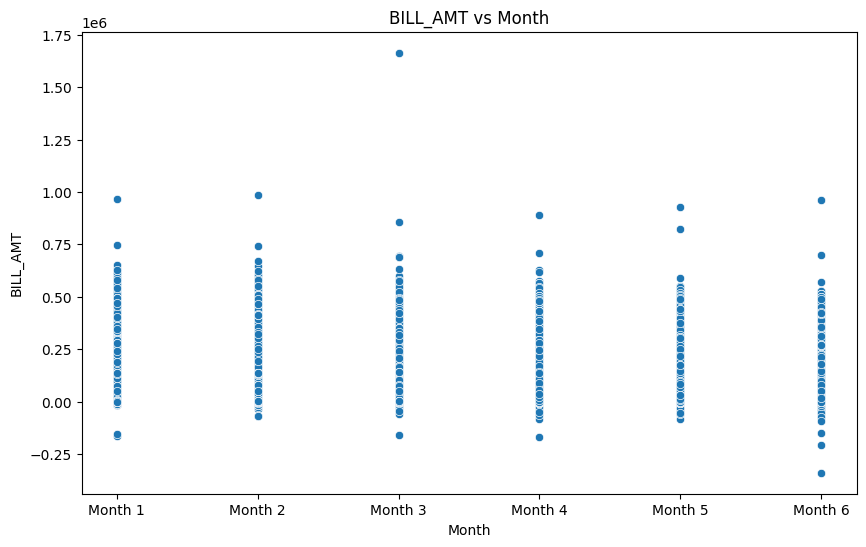

In [193]:
# Plot BILL_AMT vs Month using scatter plot showing all values in the same month
plt.figure(figsize=(10, 6))
sns.scatterplot(data=uci_cc_forecasting_data_melted, x='Month', y='BILL_AMT')
plt.title('BILL_AMT vs Month')
plt.show()


In [194]:
# Select only one value for month where all values are different from 0
uci_cc_forecasting_data_melted = uci_cc_forecasting_data_melted[uci_cc_forecasting_data_melted['BILL_AMT'] != 0]

uci_cc_forecasting_data_melted

,Month,BILL_AMT
0,Month 1,3913.0
1,Month 1,2682.0
2,Month 1,29239.0
3,Month 1,46990.0
4,Month 1,8617.0
...,...,...
179994,Month 6,81158.0
179995,Month 6,15980.0
179997,Month 6,19357.0
179998,Month 6,48944.0


In [195]:
# Select only the first value of each month
uci_cc_forecasting_data_melted = uci_cc_forecasting_data_melted.groupby('Month').first().reset_index()

uci_cc_forecasting_data_melted

,Month,BILL_AMT
0,Month 1,3913.0
1,Month 2,3102.0
2,Month 3,689.0
3,Month 4,3272.0
4,Month 5,3455.0
5,Month 6,3261.0


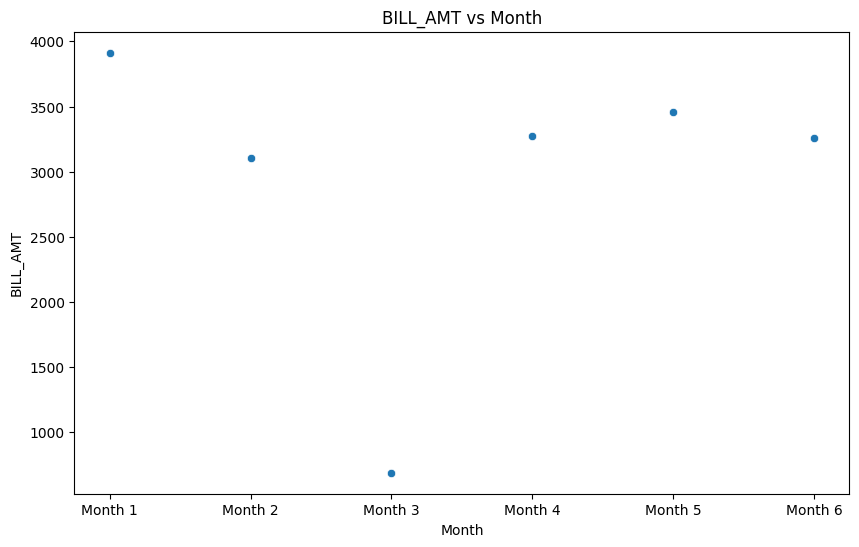

In [196]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = uci_cc_forecasting_data_melted, x = 'Month', y = 'BILL_AMT')
plt.title('BILL_AMT vs Month')
plt.show()

In [197]:
uci_cc_split_month = 'Month 5'

uci_cc_data_train = uci_cc_forecasting_data_melted[uci_cc_forecasting_data_melted["Month"] < uci_cc_split_month]
uci_cc_data_test = uci_cc_forecasting_data_melted[uci_cc_forecasting_data_melted["Month"] >= uci_cc_split_month]

print(uci_cc_data_train)
print(uci_cc_data_test)

     Month  BILL_AMT
0  Month 1    3913.0
1  Month 2    3102.0
2  Month 3     689.0
3  Month 4    3272.0
     Month  BILL_AMT
4  Month 5    3455.0
5  Month 6    3261.0


In [198]:
uci_cc_data_train_indexed = uci_cc_data_train.set_index("Month")

uci_cc_data_train_indexed

,BILL_AMT
Month,
Month 1,3913.0
Month 2,3102.0
Month 3,689.0
Month 4,3272.0


In [199]:
uci_cc_data_test_indexed = uci_cc_data_test.set_index("Month")

uci_cc_data_test_indexed

,BILL_AMT
Month,
Month 5,3455.0
Month 6,3261.0


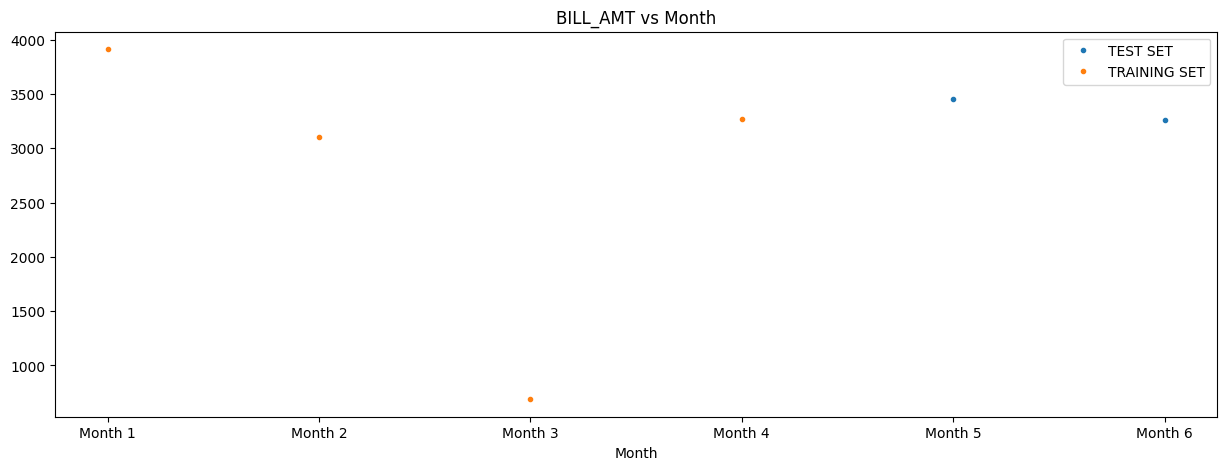

In [200]:
_ = uci_cc_data_test_indexed \
    .rename(columns = {'BILL_AMT': 'TEST SET'}) \
    .join(uci_cc_data_train_indexed.rename(columns = {'BILL_AMT': 'TRAINING SET'}), how = 'outer') \
    .plot(figsize = (15,5), title = 'BILL_AMT vs Month', style = '.')

## Split data

In [201]:
# Create numerical mapping for Months
uci_cc_month_mapping = {
    month: i + 1
    
    for i, month in enumerate(uci_cc_data_train["Month"].tolist() + uci_cc_data_test["Month"].tolist())
}

# Map "Month" to numerical values safely
uci_cc_data_train.loc[:, "Month_Num"] = uci_cc_data_train["Month"].map(uci_cc_month_mapping)
uci_cc_data_test.loc[:, "Month_Num"] = uci_cc_data_test["Month"].map(uci_cc_month_mapping)

# Prepare the data for XGBoost model
uci_cc_X_train = uci_cc_data_train["Month_Num"].values.reshape(-1, 1)
uci_cc_y_train = uci_cc_data_train["BILL_AMT"]
uci_cc_X_test = uci_cc_data_test["Month_Num"].values.reshape(-1, 1)
uci_cc_y_test = uci_cc_data_test["BILL_AMT"]


/var/folders/1l/1176zbkd1hd_ksjsrk705xxc0000gn/T/ipykernel_1845/1884445968.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uci_cc_data_train.loc[:, "Month_Num"] = uci_cc_data_train["Month"].map(uci_cc_month_mapping)
/var/folders/1l/1176zbkd1hd_ksjsrk705xxc0000gn/T/ipykernel_1845/1884445968.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uci_cc_data_test.loc[:, "Month_Num"] = uci_cc_data_test["Month"].map(uci_cc_month_mapping)


## XGBoost model

In [202]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [203]:
uci_cc_X_train

array([[1],
       [2],
       [3],
       [4]])

In [204]:
uci_cc_X_test

array([[5],
       [6]])

In [ ]:
# Train XGBoost model
#uci_cc_xgboost_model = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = 42)
#uci_cc_xgboost_model.fit(uci_cc_X_train, uci_cc_y_train)

uci_cc_xgboost_model = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
uci_cc_xgboost_model.fit(uci_cc_X_train, uci_cc_y_train,
        eval_set=[(uci_cc_X_train, uci_cc_y_train), (uci_cc_X_test, uci_cc_y_test)],
        verbose=True)

# Predict with test data
uci_cc_xgboost_forcast = uci_cc_xgboost_model.predict(uci_cc_X_test)

# Calculate metrics
uci_cc_xgboost_mae = mean_absolute_error(uci_cc_y_test, uci_cc_xgboost_forcast)
uci_cc_xgboost_mse = mean_squared_error(uci_cc_y_test, uci_cc_xgboost_forcast)
uci_cc_xgboost_mape = mean_absolute_percentage_error(uci_cc_y_test, uci_cc_xgboost_forcast)

print(f"MAE: { uci_cc_xgboost_mae }")
print(f"MSE: { uci_cc_xgboost_mse }")
print(f"MAPE: { uci_cc_xgboost_mape }")

[0]	validation_0-rmse:1040.14072	validation_1-rmse:543.52561
[1]	validation_0-rmse:884.11961	validation_1-rmse:477.43747
[2]	validation_0-rmse:751.50169	validation_1-rmse:421.56930
[3]	validation_0-rmse:638.77639	validation_1-rmse:374.40296
[4]	validation_0-rmse:542.95990	validation_1-rmse:334.64302
[5]	validation_0-rmse:461.51596	validation_1-rmse:301.18263
[6]	validation_0-rmse:392.28857	validation_1-rmse:273.07333
[7]	validation_0-rmse:333.44529	validation_1-rmse:249.50254
[8]	validation_0-rmse:283.42847	validation_1-rmse:229.77220
[9]	validation_0-rmse:240.91423	validation_1-rmse:213.28359
[10]	validation_0-rmse:204.77710	validation_1-rmse:199.52300
[11]	validation_0-rmse:174.06055	validation_1-rmse:188.05143
[12]	validation_0-rmse:147.95144	validation_1-rmse:178.49480
[13]	validation_0-rmse:125.75872	validation_1-rmse:170.53588
[14]	validation_0-rmse:106.89490	validation_1-rmse:163.90679
[15]	validation_0-rmse:90.86066	validation_1-rmse:158.38285
[16]	validation_0-rmse:77.23158	va

In [206]:
uci_cc_data_train

,Month,BILL_AMT,Month_Num
0,Month 1,3913.0,1
1,Month 2,3102.0,2
2,Month 3,689.0,3
3,Month 4,3272.0,4


In [207]:
uci_cc_data_test

,Month,BILL_AMT,Month_Num
4,Month 5,3455.0,5
5,Month 6,3261.0,6


In [208]:
uci_cc_xgboost_forcast

array([3271.9993, 3271.9993], dtype=float32)

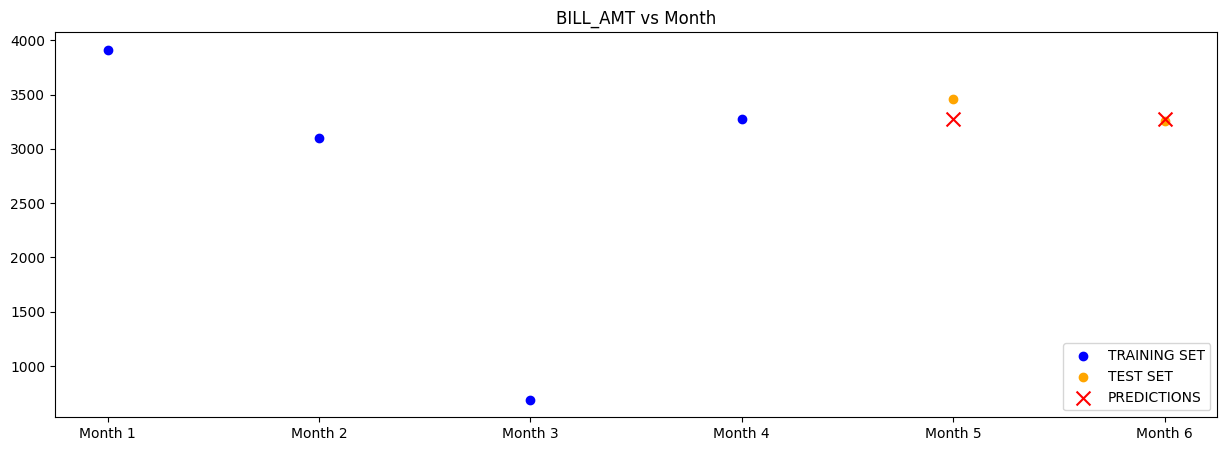

In [209]:
# Plot
plt.figure(figsize=(15, 5))

plt.scatter(
    uci_cc_data_train["Month_Num"],
    uci_cc_data_train["BILL_AMT"],
    label = "TRAINING SET",
    color = 'blue'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_data_test["BILL_AMT"],
    label = "TEST SET",
    color = 'orange'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_xgboost_forcast,
    label = "PREDICTIONS",
    color = 'red',
    marker = 'x',
    s = 100
)

# Set x-axis labels to months
plt.xticks(list(uci_cc_month_mapping.values()), list(uci_cc_month_mapping.keys()))
plt.title("BILL_AMT vs Month")
plt.legend(loc = 'lower right',)
plt.show()

In [210]:
import numpy as np

In [211]:
# Create new data points for month 7 to month 12
uci_cc_X_future = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12]])

# Predict the BILL_AMT for month 7 to month 12
uci_cc_xgboost_future_forcast = uci_cc_xgboost_model.predict(uci_cc_X_future)

uci_cc_xgboost_future_forcast

array([3912.9978 , 3102.     ,  689.00336, 3271.9993 , 3271.9993 ,
       3271.9993 , 3271.9993 , 3271.9993 , 3271.9993 , 3271.9993 ,
       3271.9993 , 3271.9993 ], dtype=float32)

In [212]:
# Create data_future DataFrame
uci_cc_data_future = pd.DataFrame({
    'Month': ['Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6', 'Month 7', 'Month 8', 'Month 9', 'Month 10', 'Month 11', 'Month 12'],
    'Month_Num': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'BILL_AMT': uci_cc_xgboost_future_forcast
})

uci_cc_data_future

,Month,Month_Num,BILL_AMT
0,Month 1,1,3912.997803
1,Month 2,2,3102.000000
2,Month 3,3,689.003357
3,Month 4,4,3271.999268
4,Month 5,5,3271.999268
5,Month 6,6,3271.999268
6,Month 7,7,3271.999268
7,Month 8,8,3271.999268
8,Month 9,9,3271.999268
9,Month 10,10,3271.999268


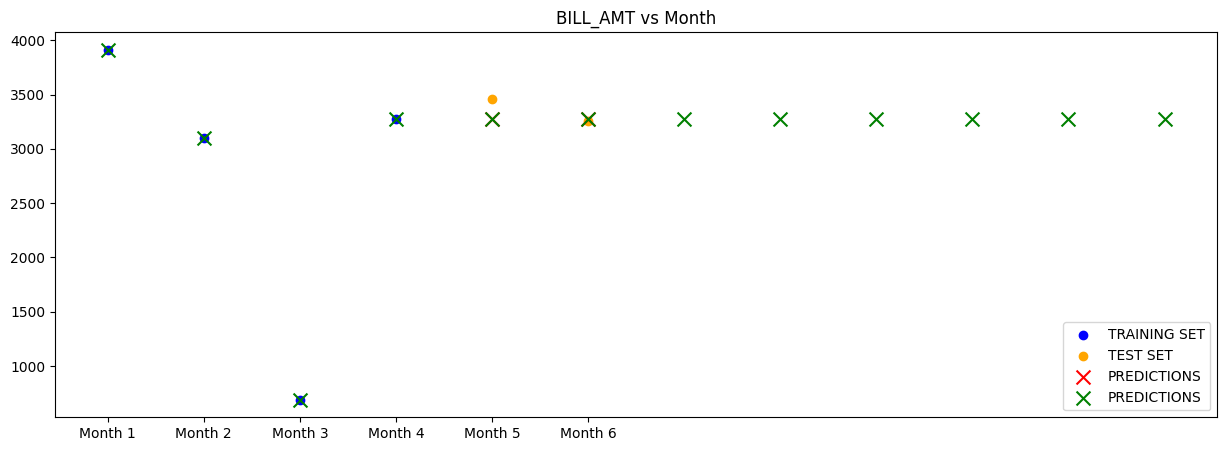

In [213]:
# Plot
plt.figure(figsize=(15, 5))

plt.scatter(
    uci_cc_data_train["Month_Num"],
    uci_cc_data_train["BILL_AMT"],
    label = "TRAINING SET",
    color = 'blue'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_data_test["BILL_AMT"],
    label = "TEST SET",
    color = 'orange'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_xgboost_forcast,
    label = "PREDICTIONS",
    color = 'red',
    marker = 'x',
    s = 100
)

plt.scatter(
    uci_cc_data_future["Month_Num"],
    uci_cc_xgboost_future_forcast,
    label = "PREDICTIONS",
    color = 'green',
    marker = 'x',
    s = 100
)

# Set x-axis labels to months
plt.xticks(list(uci_cc_month_mapping.values()), list(uci_cc_month_mapping.keys()))
plt.title("BILL_AMT vs Month")
plt.legend(loc = 'lower right',)
plt.show()

## ARIMA model

In [214]:
import numpy as np
import statsmodels.api as sm

In [ ]:
# Train ARIMA model (p, d, q)
uci_cc_arima_model = sm.tsa.ARIMA(uci_cc_y_train, order = (1, 1, 1))

# Explainme the order
# p: number of lag observations included in the model
# d: number of times that the raw observations are differenced
# q: size of the moving average window

# What other parameters can be used?
# trend: 'n', 'c', 't', 'ct'
# enforce_stationarity: True, False
# enforce_invertibility: True, False

# Train ARIMA model with other parameters
#uci_cc_arima_model = sm.tsa.ARIMA(uci_cc_y_train, order = (1,1,1), trend = 'c', enforce_stationarity = False, enforce_invertibility = False)

uci_cc_arima_model_fit = uci_cc_arima_model.fit()

# Predict on test set
uci_cc_arima_forecast = uci_cc_arima_model_fit.forecast(steps = len(uci_cc_y_test))

# Evaluate performance
uci_cc_arima_mae = mean_absolute_error(uci_cc_y_test, uci_cc_arima_forecast)
uci_cc_arima_mse = mean_squared_error(uci_cc_y_test, uci_cc_arima_forecast)
uci_cc_arima_mape = mean_absolute_percentage_error(uci_cc_y_test, uci_cc_arima_forecast)

print(f"ARIMA Model Metrics:")
print(f"MAE: { uci_cc_arima_mae }")
print(f"MSE: { uci_cc_arima_mse }")
print(f"MAPE: { uci_cc_arima_mape }")

ARIMA Model Metrics:
MAE: 1030.6268435268144
MSE: 1101891.1985242707
MAPE: 0.305457777972584


/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [216]:
uci_cc_arima_forecast

4    2225.125803
5    2429.620510
Name: predicted_mean, dtype: float64

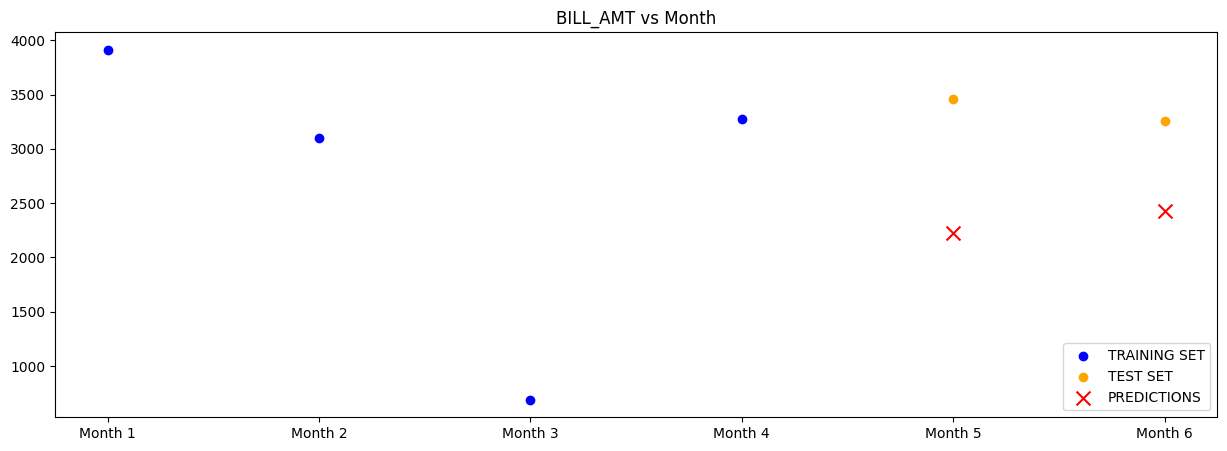

In [217]:
# Plot
plt.figure(figsize=(15, 5))

plt.scatter(
    uci_cc_data_train["Month_Num"],
    uci_cc_data_train["BILL_AMT"],
    label = "TRAINING SET",
    color = 'blue'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_data_test["BILL_AMT"],
    label="TEST SET",
    color='orange'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_arima_forecast,
    label = "PREDICTIONS",
    color = 'red',
    marker = 'x',
    s = 100
)

# Set x-axis labels to months
plt.xticks(list(uci_cc_month_mapping.values()), list(uci_cc_month_mapping.keys()))
plt.title("BILL_AMT vs Month")
plt.legend(loc = 'lower right',)
plt.show()

In [218]:
# Predict the BILL_AMT for month 7 to month 12
uci_cc_arima_future_forecast = uci_cc_arima_model_fit.forecast(steps = len(uci_cc_data_future))

uci_cc_arima_future_forecast

4     2225.125803
5     2429.620510
6     2389.674846
7     2397.477767
8     2395.953557
9     2396.251294
10    2396.193134
11    2396.204495
12    2396.202276
13    2396.202709
14    2396.202625
15    2396.202641
Name: predicted_mean, dtype: float64

In [219]:
uci_cc_data_future["Month_Num"]

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: Month_Num, dtype: int64

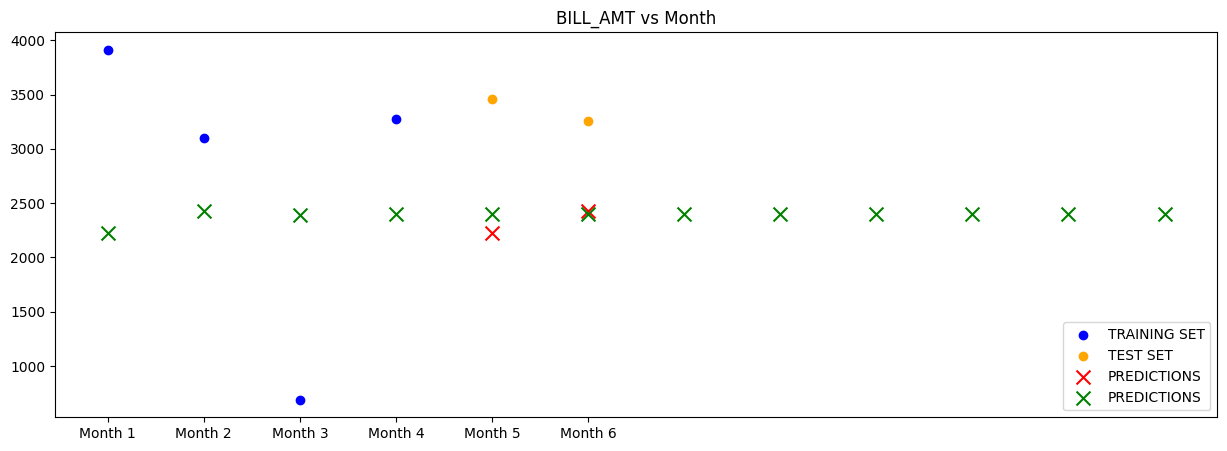

In [220]:
# Plot
plt.figure(figsize=(15, 5))

plt.scatter(
    uci_cc_data_train["Month_Num"],
    uci_cc_data_train["BILL_AMT"],
    label = "TRAINING SET",
    color = 'blue'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_data_test["BILL_AMT"],
    label="TEST SET",
    color='orange'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_arima_forecast,
    label = "PREDICTIONS",
    color = 'red',
    marker = 'x',
    s = 100
)

plt.scatter(
    uci_cc_data_future["Month_Num"],
    uci_cc_arima_future_forecast,
    label = "PREDICTIONS",
    color = 'green',
    marker = 'x',
    s = 100
)

# Set x-axis labels to months
plt.xticks(list(uci_cc_month_mapping.values()), list(uci_cc_month_mapping.keys()))
plt.title("BILL_AMT vs Month")
plt.legend(loc = 'lower right',)
plt.show()

## SARIMA model

In [ ]:
uci_cc_sarima_model = sm.tsa.SARIMAX(uci_cc_y_train, order=(1,1,1))
uci_cc_sarima_model_fit = uci_cc_sarima_model.fit()

# Predict with SARIMA
uci_cc_sarima_forecast = uci_cc_sarima_model_fit.forecast(steps=len(uci_cc_y_test))

# Evaluate performance
uci_cc_sarima_mae = mean_absolute_error(uci_cc_y_test, uci_cc_sarima_forecast)
uci_cc_sarima_mse = mean_squared_error(uci_cc_y_test, uci_cc_sarima_forecast)
uci_cc_sarima_mape = mean_absolute_percentage_error(uci_cc_y_test, uci_cc_sarima_forecast)

print(f"ARIMA Model Metrics:")
print(f"MAE: { uci_cc_sarima_mae }")
print(f"MSE: { uci_cc_sarima_mse }")
print(f"MAPE: { uci_cc_sarima_mape }")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.81772D+00    |proj g|=  5.15031D-01

At iterate    5    f=  6.56454D+00    |proj g|=  5.80981D-03

At iterate   10    f=  6.56440D+00    |proj g|=  3.92138D-04

At iterate   15    f=  6.56429D+00    |proj g|=  7.50283D-03

At iterate   20    f=  6.48394D+00    |proj g|=  1.75095D-03

At iterate   25    f=  6.48394D+00    |proj g|=  7.77438D-04

At iterate   30    f=  6.48391D+00    |proj g|=  2.86296D-03
ARIMA Model Metrics:
MAE: 1030.6268435268144
MSE: 1101891.1985242707
MAPE: 0.305457777972584

At iterate   35    f=  6.48388D+00    |proj g|=  9.24052D-04

At iterate   40    f=  6.48388D+00    |proj g|=  8.17059D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of 

/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


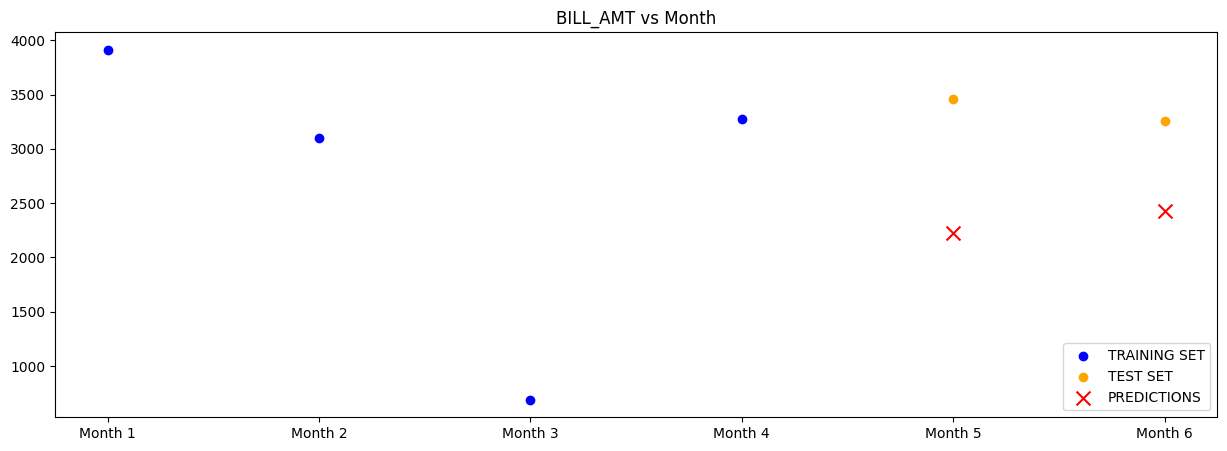

In [222]:
# Plot
plt.figure(figsize=(15, 5))

plt.scatter(
    uci_cc_data_train["Month_Num"],
    uci_cc_data_train["BILL_AMT"],
    label = "TRAINING SET",
    color = 'blue'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_data_test["BILL_AMT"],
    label = "TEST SET",
    color = 'orange'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_sarima_forecast,
    label = "PREDICTIONS",
    color = 'red',
    marker = 'x',
    s = 100
)

# Set x-axis labels to months
plt.xticks(list(uci_cc_month_mapping.values()), list(uci_cc_month_mapping.keys()))
plt.title("BILL_AMT vs Month")
plt.legend(loc='lower right',)
plt.show()

In [223]:
# Predict the BILL_AMT for month 7 to month 12
uci_cc_sarima_future_forecast = uci_cc_sarima_model_fit.forecast(steps = len(uci_cc_data_future))

uci_cc_sarima_future_forecast

4     2225.125803
5     2429.620510
6     2389.674846
7     2397.477767
8     2395.953557
9     2396.251294
10    2396.193134
11    2396.204495
12    2396.202276
13    2396.202709
14    2396.202625
15    2396.202641
Name: predicted_mean, dtype: float64

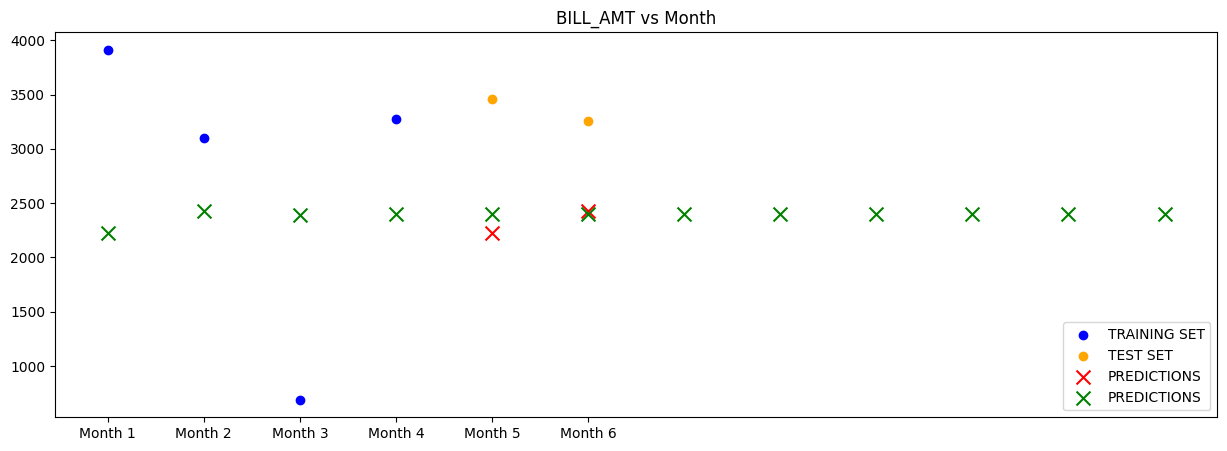

In [224]:
# Plot
plt.figure(figsize=(15, 5))

plt.scatter(
    uci_cc_data_train["Month_Num"],
    uci_cc_data_train["BILL_AMT"],
    label = "TRAINING SET",
    color = 'blue'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_data_test["BILL_AMT"],
    label="TEST SET",
    color='orange'
)

plt.scatter(
    uci_cc_data_test["Month_Num"],
    uci_cc_sarima_forecast,
    label = "PREDICTIONS",
    color = 'red',
    marker = 'x',
    s = 100
)

plt.scatter(
    uci_cc_data_future["Month_Num"],
    uci_cc_sarima_future_forecast,
    label = "PREDICTIONS",
    color = 'green',
    marker = 'x',
    s = 100
)

# Set x-axis labels to months
plt.xticks(list(uci_cc_month_mapping.values()), list(uci_cc_month_mapping.keys()))
plt.title("BILL_AMT vs Month")
plt.legend(loc = 'lower right',)
plt.show()